
=== Data Loading and Preparation ===

Original dataset shape: (303, 14)
Dataset shape after dropping missing values: (297, 14)

First 5 samples:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Training samples: 237, Test samples: 60

=== Decision Tree Classifier ===

Initial Decision Tree (Unlimited Depth):
  - Training Accuracy: 1.000
  - Testing Accuracy: 0.700

Finding Optimal Tree Depth:
Depth 1:

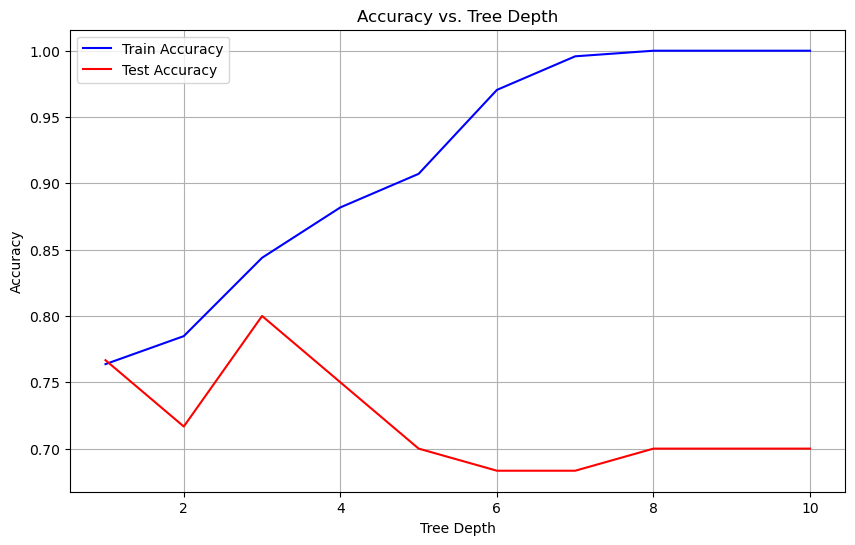


Selected optimal depth: 3

Final Decision Tree Performance:
  - Training Accuracy: 0.844
  - Testing Accuracy: 0.800


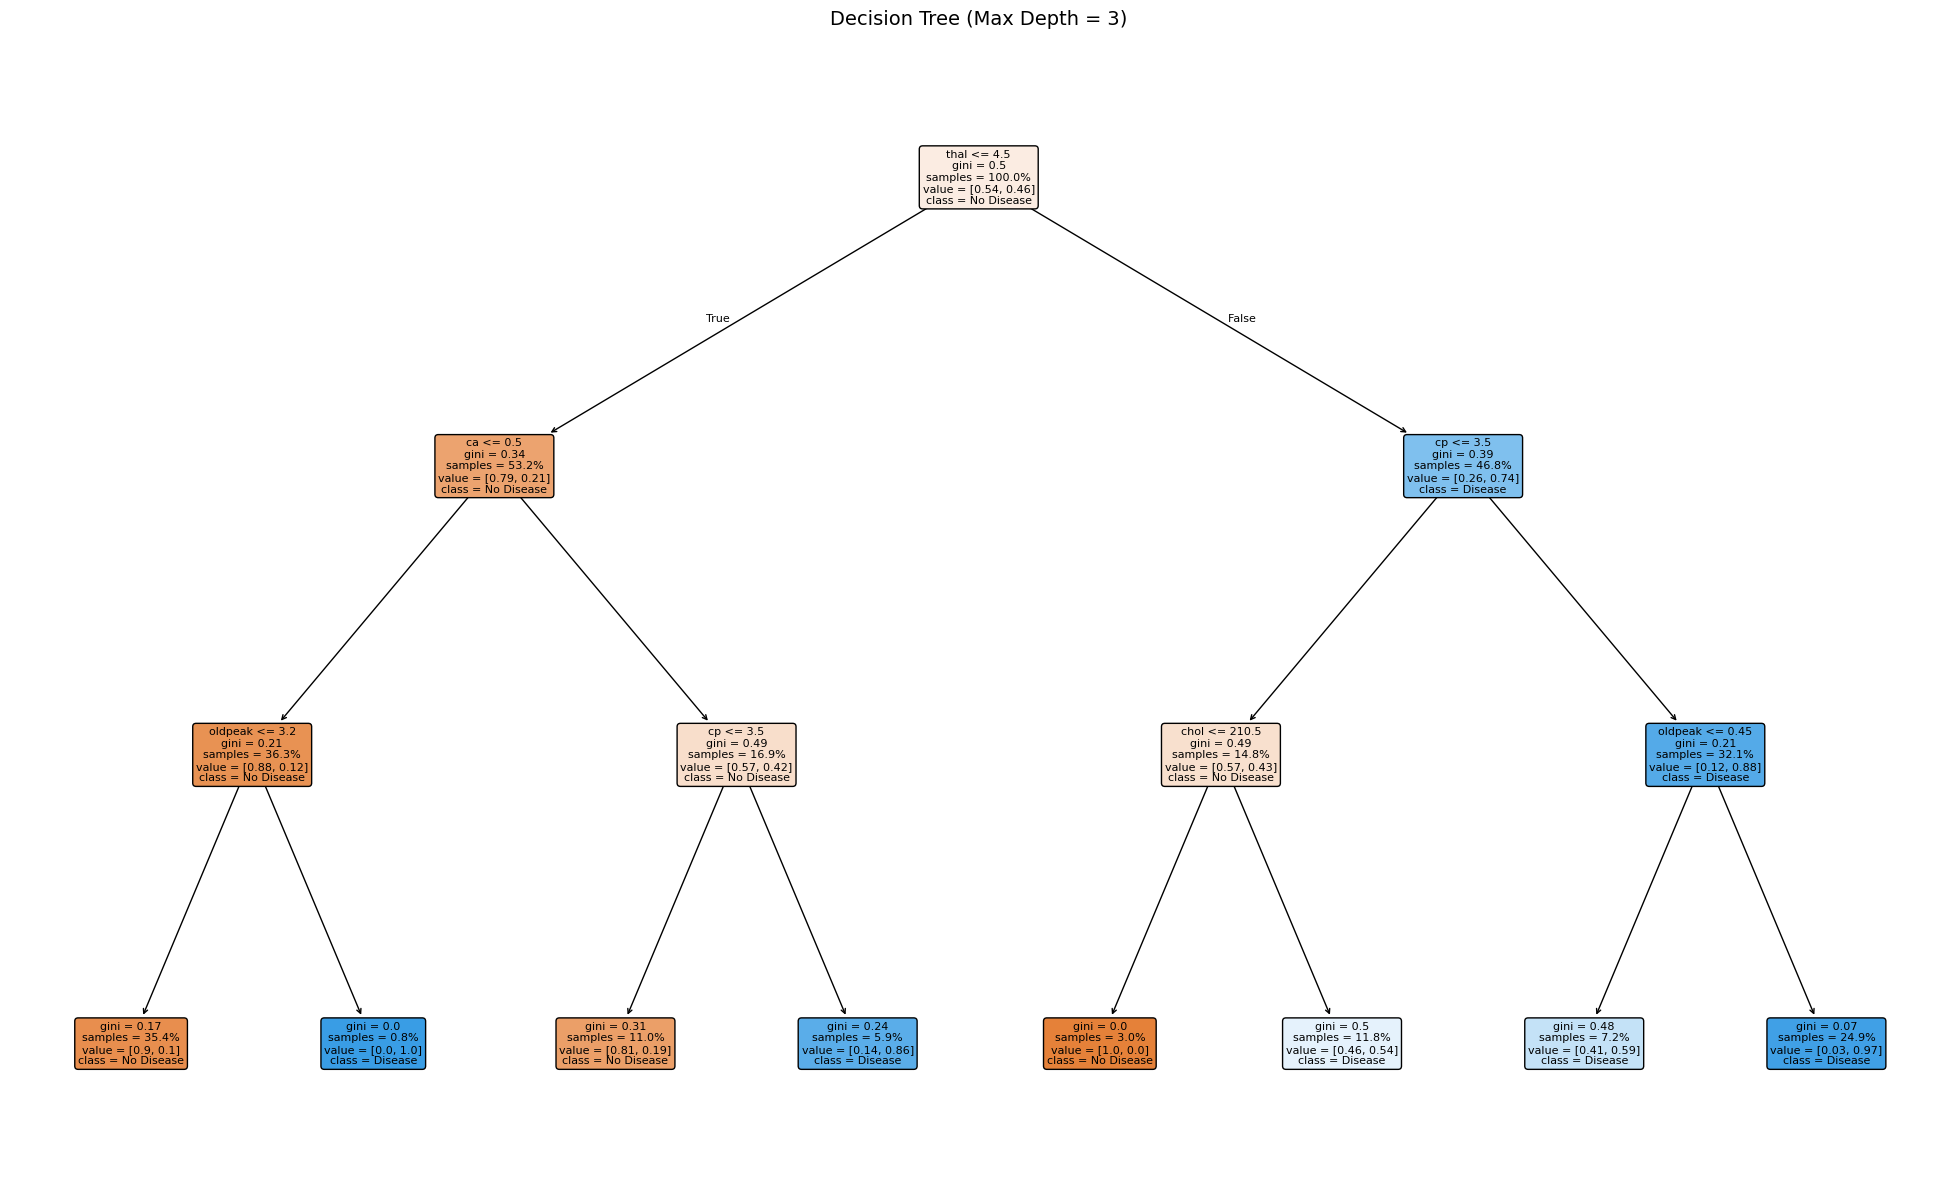


=== Random Forest Classifier ===

Random Forest Performance:
  - Training Accuracy: 0.878
  - Testing Accuracy: 0.833

Model Comparison:
Decision Tree Test Accuracy: 0.800
Random Forest Test Accuracy: 0.833

Top 5 Important Features:
         importance
cp         0.195541
thal       0.185112
ca         0.133726
oldpeak    0.117153
thalach    0.100137


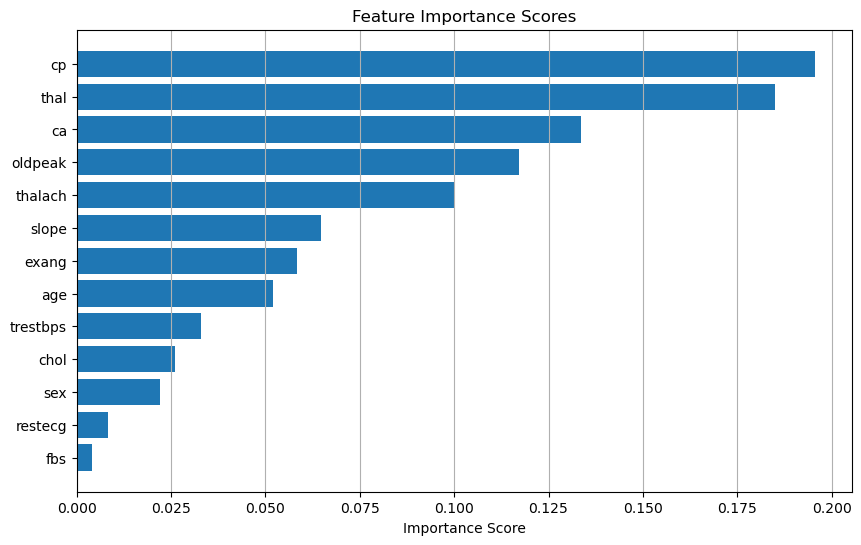


=== Cross-Validation Results ===

Decision Tree CV Accuracy: 0.795 ± 0.060
Random Forest CV Accuracy: 0.835 ± 0.045

=== Final Model Evaluation ===

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60


Confusion Matrix:


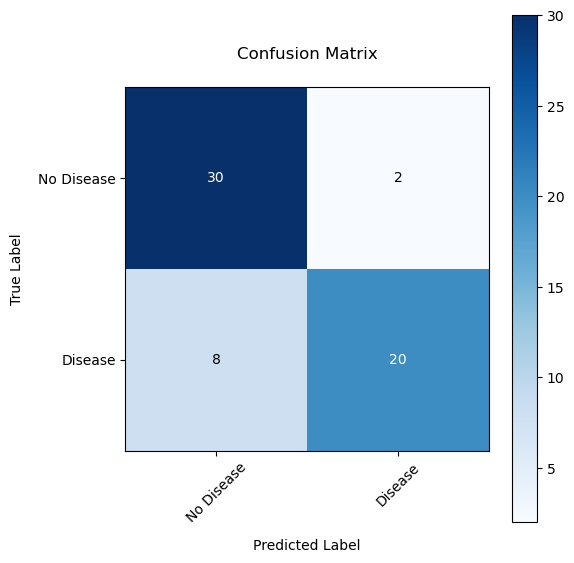


=== Analysis Complete ===


In [1]:
# Decision Trees and Random Forests for Heart Disease Prediction
# Complete Guide with Visualization, Overfitting Analysis, and Feature Importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------------
# 1. Data Loading and Preparation
# ----------------------------------
print("\n=== Data Loading and Preparation ===\n")

# Load Cleveland Heart Disease dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read and clean data
try:
    data = pd.read_csv(url, names=column_names, na_values='?')
    print(f"Original dataset shape: {data.shape}")
    
    # Handle missing values by dropping rows with missing data
    data = data.dropna()
    print(f"Dataset shape after dropping missing values: {data.shape}")
    
    # Convert target to binary (0: no disease, 1: disease)
    data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
    
    print("\nFirst 5 samples:")
    print(data.head())
    
except Exception as e:
    print(f"\nError loading dataset: {str(e)}")
    print("Using sample data instead...")
    # Sample data fallback (in case URL fails)
    sample_data = {
        'age': [63, 67, 67, 37, 41],
        'sex': [1, 1, 1, 1, 0],
        'cp': [3, 4, 2, 1, 0],
        'trestbps': [145, 160, 120, 130, 130],
        'chol': [233, 286, 229, 250, 204],
        'fbs': [1, 0, 0, 0, 0],
        'restecg': [0, 1, 1, 1, 1],
        'thalach': [150, 108, 129, 187, 172],
        'exang': [0, 1, 1, 0, 0],
        'oldpeak': [2.3, 1.5, 2.6, 3.5, 1.4],
        'slope': [2, 1, 2, 3, 1],
        'ca': [0, 3, 2, 0, 0],
        'thal': [1, 2, 2, 1, 1],
        'target': [1, 1, 1, 0, 0]
    }
    data = pd.DataFrame(sample_data)

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining samples: {len(X_train)}, Test samples: {len(X_test)}")

# ----------------------------------
# 2. Decision Tree Implementation
# ----------------------------------
print("\n=== Decision Tree Classifier ===\n")

def train_decision_tree(X_train, y_train, X_test, y_test, max_depth=None):
    """Train and evaluate a decision tree classifier."""
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    
    return dt, train_acc, test_acc

# Train initial tree with default parameters
dt, train_acc, test_acc = train_decision_tree(X_train, y_train, X_test, y_test)
print(f"Initial Decision Tree (Unlimited Depth):")
print(f"  - Training Accuracy: {train_acc:.3f}")
print(f"  - Testing Accuracy: {test_acc:.3f}")

# Find optimal depth to prevent overfitting
print("\nFinding Optimal Tree Depth:")
max_depths = range(1, 11)
train_scores = []
test_scores = []

for depth in max_depths:
    dt_tmp, train_acc, test_acc = train_decision_tree(
        X_train, y_train, X_test, y_test, max_depth=depth
    )
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print(f"Depth {depth}: Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}")

# Plot accuracy vs. tree depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'b-', label='Train Accuracy')
plt.plot(max_depths, test_scores, 'r-', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.legend()
plt.grid()
plt.show()

# Train with optimal depth (selected based on plot)
optimal_depth = 3
print(f"\nSelected optimal depth: {optimal_depth}")

dt_final, dt_train_acc, dt_test_acc = train_decision_tree(
    X_train, y_train, X_test, y_test, max_depth=optimal_depth
)

print("\nFinal Decision Tree Performance:")
print(f"  - Training Accuracy: {dt_train_acc:.3f}")
print(f"  - Testing Accuracy: {dt_test_acc:.3f}")

# Visualize the decision tree using matplotlib's plot_tree
plt.figure(figsize=(25, 15))
plot_tree(
    dt_final, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['No Disease', 'Disease'], 
    rounded=True,
    proportion=True,
    fontsize=8,  # Reduced font size to fit better
    precision=2
)
plt.title(f"Decision Tree (Max Depth = {optimal_depth})", fontsize=14)
plt.show()

# ----------------------------------
# 3. Random Forest Implementation
# ----------------------------------
print("\n=== Random Forest Classifier ===\n")

def train_random_forest(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None):
    """Train and evaluate a random forest classifier."""
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    train_acc = rf.score(X_train, y_train)
    test_acc = rf.score(X_test, y_test)
    
    return rf, train_acc, test_acc

# Train random forest
rf, rf_train_acc, rf_test_acc = train_random_forest(
    X_train, y_train, X_test, y_test, 
    n_estimators=100, 
    max_depth=optimal_depth
)

print("Random Forest Performance:")
print(f"  - Training Accuracy: {rf_train_acc:.3f}")
print(f"  - Testing Accuracy: {rf_test_acc:.3f}")

# Compare with decision tree
print("\nModel Comparison:")
print(f"Decision Tree Test Accuracy: {dt_test_acc:.3f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.3f}")

# Feature Importance Analysis
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importances.head(5))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.grid(axis='x')
plt.show()

# ----------------------------------
# 4. Cross-Validation and Evaluation
# ----------------------------------
print("\n=== Cross-Validation Results ===")

def run_cross_validation(model, X, y, cv=5):
    """Run cross-validation and return mean/std of accuracy scores."""
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Decision Tree CV
dt_cv_mean, dt_cv_std = run_cross_validation(dt_final, X, y)
print(f"\nDecision Tree CV Accuracy: {dt_cv_mean:.3f} ± {dt_cv_std:.3f}")

# Random Forest CV
rf_cv_mean, rf_cv_std = run_cross_validation(rf, X, y)
print(f"Random Forest CV Accuracy: {rf_cv_mean:.3f} ± {rf_cv_std:.3f}")

# Final evaluation
print("\n=== Final Model Evaluation ===")
print("\nRandom Forest Classification Report:")
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', pad=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j],
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max()/2 else "black")
    
    plt.xlabel('Predicted Label', labelpad=10)
    plt.ylabel('True Label', labelpad=10)
    plt.tight_layout()

print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, y_pred, classes=['No Disease', 'Disease'])
plt.show()

print("\n=== Analysis Complete ===")
